<a href="https://colab.research.google.com/github/Domsheen/learning-coding-projects/blob/main/NodeClassificationWithCiteSeerDataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.1 MB/s eta 0:00:00


In [8]:
import torch
import random
import matplotlib.pyplot as plt


In [12]:
# Import the Planetoid dataset class from PyTorch Geometric (PyG)
from torch_geometric.datasets import Planetoid

# Import NormalizeFeatures to normalize node features
from torch_geometric.transforms import NormalizeFeatures

# Load the Citeseer dataset with node feature normalization
citeseer_dataset = Planetoid(root="Citeseer_dataset", name="Citeseer", transform=NormalizeFeatures())


In [16]:
# Get the number of graphs in the dataset
len(citeseer_dataset)

1

In [17]:
# Get the number of classes in the dataset
citeseer_dataset.num_classes

# num_classes returns the number of unique categories (labels) for node classification.


6

In [18]:
# Get the number of node features
citeseer_dataset.num_node_features

# In Citeseer, each node (paper) is represented by a feature vector of word embeddings.


3703

In [20]:
# Extract the actual graph from the dataset
citeseer_graph = citeseer_dataset[0]

# Print the graph data object
citeseer_graph

# Output:
# Data(x=[3327, 3703], edge_index=[2, 9228], y=[3327])


Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])

In [21]:
citeseer_graph.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [22]:
# Print the number of training samples (nodes used for training)
print("Training samples: ", citeseer_graph.train_mask.sum().item())

# Print the number of validation samples (nodes used for validation)
print("Validation samples: ", citeseer_graph.val_mask.sum().item())

# Print the number of test samples (nodes used for testing)
print("Test samples: ", citeseer_graph.test_mask.sum().item())


Training samples:  120
Validation samples:  500
Test samples:  1000


In [24]:
# Get the labels for each node in the graph
citeseer_graph.y

tensor([3, 1, 5,  ..., 3, 1, 5])

In [25]:
# Print the total number of nodes in the graph
print(f'Number of nodes: {citeseer_graph.num_nodes}')

# Print the total number of edges (connections) in the graph
print(f'Number of edges: {citeseer_graph.num_edges}')

# Calculate and print the average node degree (connections per node)
print(f'Average node degree: {citeseer_graph.num_edges / citeseer_graph.num_nodes:.2f}')

# Check if the graph has isolated nodes (nodes with no edges)
print(f'Has isolated nodes: {citeseer_graph.has_isolated_nodes()}')

# Check if the graph contains self-loops (nodes connecting to themselves)
print(f'Has self-loops: {citeseer_graph.has_self_loops()}')

# Check if the graph is undirected (if for every edge A → B, there's also B → A)
print(f'Is undirected: {citeseer_graph.is_undirected()}')


Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Has isolated nodes: True
Has self-loops: False
Is undirected: True


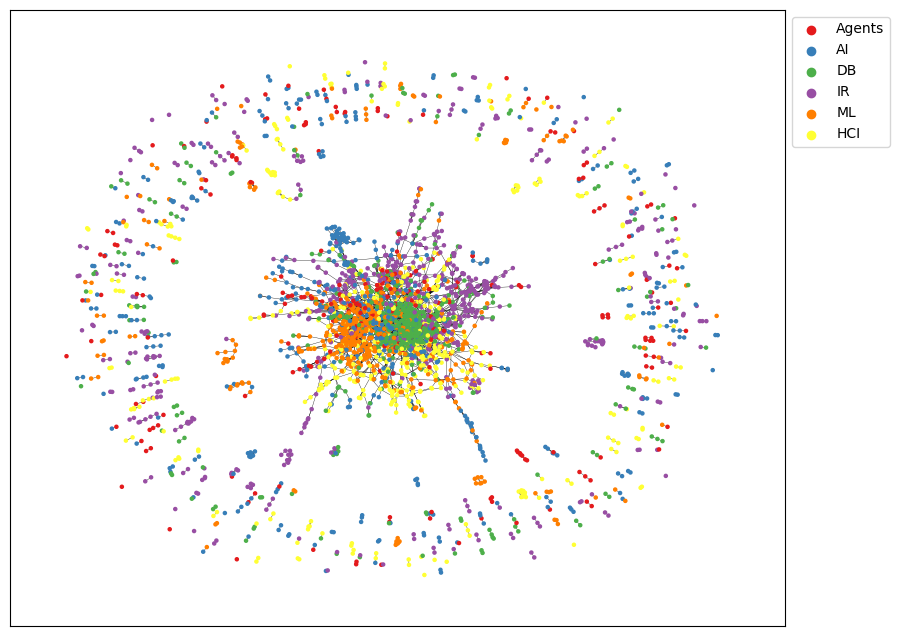

In [28]:
# Import necessary libraries
import networkx as nx  # NetworkX is used for graph visualization and manipulation
from torch_geometric.utils import to_networkx  # Converts PyTorch Geometric (PyG) graphs to NetworkX format
import matplotlib.pyplot as plt  # Used for plotting

# Define a dictionary to map numerical labels to category names
label_dict = {
    0: "Agents",  # Category 0 corresponds to "Agents"
    1: "AI",      # Category 1 corresponds to "AI"
    2: "DB",      # Category 2 corresponds to "Databases (DB)"
    3: "IR",      # Category 3 corresponds to "Information Retrieval (IR)"
    4: "ML",      # Category 4 corresponds to "Machine Learning (ML)"
    5: "HCI"      # Category 5 corresponds to "Human-Computer Interaction (HCI)"
}

# Define a list of colors, one for each class label
# These colors will be used to color-code nodes based on their category
colorlist = ['#e41a1c',  # Red for "Agents"
             '#377eb8',  # Blue for "AI"
             '#4daf4a',  # Green for "DB"
             '#984ea3',  # Purple for "IR"
             '#ff7f00',  # Orange for "ML"
             '#ffff33']  # Yellow for "HCI"

# Convert the PyTorch Geometric graph (citeseer_graph) into a NetworkX graph
# This allows us to use NetworkX's built-in visualization and manipulation tools
G = to_networkx(citeseer_graph, to_undirected=True)
# `to_undirected=True` ensures the graph is converted to an undirected format (bidirectional edges)

# Prepare node colors based on labels
# Each node gets assigned a color based on its category (from `colorlist`)
node_color = [colorlist[int(label)] for label in citeseer_graph.y]

# Prepare label names for each node based on its category
labellist = [label_dict[int(label)] for label in citeseer_graph.y]

# Compute the layout (positions) of nodes for visualization
# `spring_layout` positions nodes in a way that minimizes edge overlap and makes the graph readable
pos = nx.spring_layout(G, seed=42)  # Seed ensures consistency in layout across multiple runs

# Create a figure for the plot with a specified size
plt.figure(figsize=(10, 8))

# Draw the graph nodes, using the computed positions and assigned colors
nx.draw_networkx_nodes(G, pos, node_size=5, node_color=node_color)
# `node_size=5` keeps nodes small for a clearer visualization
# `node_color=node_color` assigns colors based on categories

# Draw the graph edges
nx.draw_networkx_edges(G, pos, width=0.25)
# `width=0.25` makes the edges thinner to prevent clutter

# Add a legend to explain which color corresponds to which category
for label, color in zip(label_dict.values(), colorlist):
    plt.scatter([], [], c=color, label=label)
# `plt.scatter([], [], c=color, label=label)` creates invisible points in the legend with the correct colors

# Position the legend outside the graph for better readability
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

# Display the final graph visualization
plt.show()